In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [5]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [46]:
bb_all = pd.merge(bb100, features, on='SongID', how='left')
bb_all

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,http://www.billboard.com/charts/hot-100/1965-07-17,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
1,http://www.billboard.com/charts/hot-100/1965-07-24,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
2,http://www.billboard.com/charts/hot-100/1965-07-31,1965-07-31,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
3,http://www.billboard.com/charts/hot-100/1965-08-07,1965-08-07,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
4,http://www.billboard.com/charts/hot-100/1965-08-14,1965-08-14,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.6100,0.000077,0.1000,0.568,82.331,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330456,https://www.billboard.com/charts/hot-100/2018-10-20,2018-10-20,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13,Ariana Grande,God Is A Woman,"['dance pop', 'pop', 'post-teen pop']",67kQ3UW7saqCFqB54BVKKI,NaN,213068.0,0.0,k bye for now (swt live),0.602,0.658,1.0,-5.934,1.0,0.0558,0.0233,0.000060,0.2370,0.268,145.031,4.0,62.0
330457,http://www.billboard.com/charts/hot-100/1977-05-21,1977-05-21,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13,Rose Royce,I Wanna Get Next To You,"['classic soul', 'disco', 'funk', 'motown', 'post-disco', 'quiet storm', 'soul']",1rff5WJrSljfCLYFoXkDiT,NaN,238200.0,0.0,Car Wash,0.620,0.179,0.0,-19.981,1.0,0.0314,0.8350,0.030000,0.0928,0.675,130.864,4.0,51.0
330458,http://www.billboard.com/charts/hot-100/1981-05-23,1981-05-23,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13,Eric Clapton And His Band,I Can't Stand It,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330459,http://www.billboard.com/charts/hot-100/1973-09-29,1973-09-29,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13,Al Green,Here I Am Come & Take Me,"['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']",20wu6USlvWRghMOvUdfLgE,https://p.scdn.co/mp3-preview/37dbfd6ef26ecbbdaf4c9564ef8a5230767308ae?cid=b8d3901151d34489a160e3cf0ab1fa94,256693.0,0.0,Call Me,0.815,0.388,11.0,-12.238,0.0,0.0364,0.3180,0.000084,0.0673,0.846,94.558,4.0,52.0


In [71]:
keep = ['spotify_track_duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo']


In [72]:
bb_all.describe()

,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
count,330461.000000,330461.000000,298280.000000,330461.000000,330461.000000,2.871240e+05,287124.00000,286566.000000,286566.000000,286566.000000,286566.000000,286566.000000,286566.000000,286566.000000,286566.000000,286566.000000,286566.000000,286566.000000,286566.000000,287124.000000
mean,50.422328,1.076693,47.535882,41.271914,9.205849,2.285924e+05,0.11533,0.613712,0.630932,5.250745,-8.349199,0.716858,0.071686,0.260672,0.028068,0.185086,0.599601,120.047203,3.947834,47.962521
std,28.871945,0.361320,28.060854,29.542874,7.656610,6.476562e+04,0.31942,0.150181,0.193873,3.563741,3.550192,0.450526,0.078746,0.265759,0.125094,0.153654,0.235827,27.776644,0.284344,21.536824
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.968800e+04,0.00000,0.000000,0.000581,0.000000,-28.030000,0.000000,0.000000,0.000003,0.000000,0.009670,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,23.000000,14.000000,4.000000,1.886130e+05,0.00000,0.516000,0.493000,2.000000,-10.681750,0.000000,0.032100,0.038800,0.000000,0.088300,0.417000,99.026000,4.000000,33.000000
50%,50.000000,1.000000,47.000000,38.000000,7.000000,2.241060e+05,0.00000,0.622000,0.648000,5.000000,-7.772000,1.000000,0.041300,0.159000,0.000004,0.126000,0.618000,118.552000,4.000000,50.000000
75%,75.000000,1.000000,71.000000,66.000000,13.000000,2.590000e+05,0.00000,0.720000,0.787000,8.000000,-5.594000,1.000000,0.067500,0.428000,0.000357,0.239000,0.796000,135.984000,4.000000,65.000000
max,100.000000,10.000000,100.000000,100.000000,87.000000,3.079157e+06,1.00000,0.988000,0.997000,11.000000,2.291000,1.000000,0.951000,0.991000,0.982000,0.999000,0.991000,241.009000,5.000000,100.000000


In [73]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [74]:
bb_all[keep]

,spotify_track_duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,163160.0,0.574,0.256,7.0,-15.044,0.0298,0.6100,0.000077,0.1000,0.568,82.331
1,163160.0,0.574,0.256,7.0,-15.044,0.0298,0.6100,0.000077,0.1000,0.568,82.331
2,163160.0,0.574,0.256,7.0,-15.044,0.0298,0.6100,0.000077,0.1000,0.568,82.331
3,163160.0,0.574,0.256,7.0,-15.044,0.0298,0.6100,0.000077,0.1000,0.568,82.331
4,163160.0,0.574,0.256,7.0,-15.044,0.0298,0.6100,0.000077,0.1000,0.568,82.331
...,...,...,...,...,...,...,...,...,...,...,...
330456,213068.0,0.602,0.658,1.0,-5.934,0.0558,0.0233,0.000060,0.2370,0.268,145.031
330457,238200.0,0.620,0.179,0.0,-19.981,0.0314,0.8350,0.030000,0.0928,0.675,130.864
330458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330459,256693.0,0.815,0.388,11.0,-12.238,0.0364,0.3180,0.000084,0.0673,0.846,94.558


In [75]:
cols = [bb_all[keep]]
a = [NormalizeData(col) for col in cols]

In [76]:
type(a[0])

pandas.core.frame.DataFrame

In [77]:
df = a[0]

In [78]:
df

,spotify_track_duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.043769,0.580972,0.256337,0.636364,0.428284,0.031335,0.615539,0.000078,0.091304,0.573158,0.341610
1,0.043769,0.580972,0.256337,0.636364,0.428284,0.031335,0.615539,0.000078,0.091304,0.573158,0.341610
2,0.043769,0.580972,0.256337,0.636364,0.428284,0.031335,0.615539,0.000078,0.091304,0.573158,0.341610
3,0.043769,0.580972,0.256337,0.636364,0.428284,0.031335,0.615539,0.000078,0.091304,0.573158,0.341610
4,0.043769,0.580972,0.256337,0.636364,0.428284,0.031335,0.615539,0.000078,0.091304,0.573158,0.341610
...,...,...,...,...,...,...,...,...,...,...,...
330456,0.060135,0.609312,0.659782,0.090909,0.728736,0.058675,0.023509,0.000061,0.229782,0.270434,0.601766
330457,0.068376,0.627530,0.179060,0.000000,0.265460,0.033018,0.842583,0.030550,0.084027,0.681130,0.542984
330458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330459,0.074441,0.824899,0.388811,1.000000,0.520827,0.038275,0.320886,0.000085,0.058252,0.853683,0.392342


In [79]:
df.std()

spotify_track_duration_ms    0.021238
danceability                 0.152005
energy                       0.194570
key                          0.323976
loudness                     0.117087
speechiness                  0.082804
acousticness                 0.268173
instrumentalness             0.127387
liveness                     0.155311
valence                      0.237969
tempo                        0.115251
dtype: float64

<AxesSubplot:>

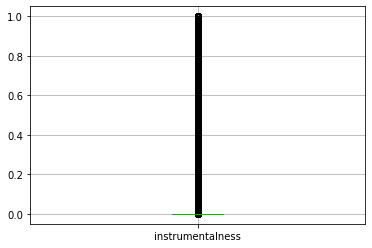

In [81]:
df.boxplot(column='instrumentalness')

In [82]:
df['instrumentalness'].describe()

count    286566.000000
mean          0.028583
std           0.127387
min           0.000000
25%           0.000000
50%           0.000004
75%           0.000364
max           1.000000
Name: instrumentalness, dtype: float64

<AxesSubplot:ylabel='instrumentalness'>

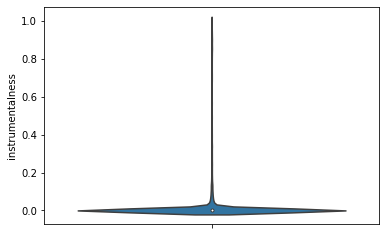

In [88]:
sns.violinplot(y='instrumentalness', data=df)

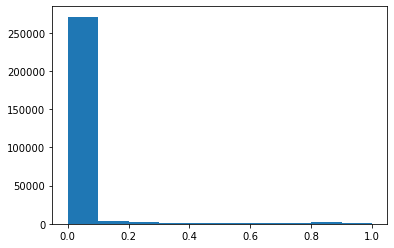

In [91]:
plt.hist(df.instrumentalness);

In [97]:
bb_all[bb_all.instrumentalness>0.5]

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
269,http://www.billboard.com/charts/hot-100/1997-08-30,1997-08-30,68,Around The World,Daft Punk,Around The WorldDaft Punk,1,NaN,68,1,Daft Punk,Around The World,"['electro', 'filter house']",1pKYYY0dkg23sQQXi0Q5zN,https://p.scdn.co/mp3-preview/6abb7faeef25296b79498738dbbfc398700944dc?cid=b8d3901151d34489a160e3cf0ab1fa94,429533.0,0.0,Homework,0.956,0.795,7.0,-5.311,1.0,0.1500,0.003560,0.889,0.0906,0.841,121.294,4.0,71.0
293,http://www.billboard.com/charts/hot-100/2007-11-03,2007-11-03,68,Shadowplay,The Killers,ShadowplayThe Killers,1,NaN,68,1,The Killers,Shadowplay,"['modern rock', 'permanent wave', 'rock']",6HbTF52swZiGSJ2cvAJ7PU,NaN,247240.0,0.0,Sawdust,0.642,0.805,2.0,-7.238,1.0,0.0476,0.000781,0.579,0.3930,0.352,145.029,4.0,56.0
410,http://www.billboard.com/charts/hot-100/1998-10-24,1998-10-24,54,Perfect,The Smashing Pumpkins,PerfectThe Smashing Pumpkins,1,NaN,54,1,The Smashing Pumpkins,Perfect,"['alternative metal', 'alternative rock', 'grunge', 'modern rock', 'permanent wave', 'pop rock', 'post-grunge', 'rock']",5DuaMIvmPyT3oEvuccx6JO,NaN,202853.0,0.0,Adore (Super Deluxe),0.644,0.912,7.0,-6.327,1.0,0.0436,0.009110,0.647,0.4490,0.540,114.289,4.0,53.0
557,http://www.billboard.com/charts/hot-100/1996-06-15,1996-06-15,18,Old Man & Me (When I Get To Heaven),Hootie & The Blowfish,Old Man & Me (When I Get To Heaven)Hootie & The Blowfish,1,15.0,13,8,Hootie & The Blowfish,Old Man & Me (When I Get To Heaven),"['mellow gold', 'neo mellow', 'pop rock', 'post-grunge']",7m96CZREV9iOPEZX0mayPm,https://p.scdn.co/mp3-preview/002adb33adc6e8dc7631a07ce0728061a9394d04?cid=b8d3901151d34489a160e3cf0ab1fa94,247536.0,0.0,Karaoke - Modern Rock - Vol. 11,0.562,0.423,4.0,-16.572,1.0,0.0283,0.000081,0.818,0.3160,0.662,99.970,4.0,0.0
708,http://www.billboard.com/charts/hot-100/1979-10-27,1979-10-27,81,Don't Let Go,Isaac Hayes,Don't Let GoIsaac Hayes,1,NaN,81,1,Isaac Hayes,Don't Let Go,"['classic soul', 'disco', 'funk', 'jazz funk', 'memphis soul', 'motown', 'quiet storm', 'soul', 'southern soul']",0bFGteEuBXbVd0fbV2XpD3,NaN,435160.0,0.0,Don't Let Go (Expanded Edition),0.864,0.691,8.0,-9.118,1.0,0.0626,0.000025,0.778,0.0415,0.962,136.702,4.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330304,http://www.billboard.com/charts/hot-100/1965-02-13,1965-02-13,19,Keep Searchin' (We'll Follow The Sun),Del Shannon,Keep Searchin' (We'll Follow The Sun)Del Shannon,1,13.0,9,13,Del Shannon,Keep Searchin' (We'll Follow The Sun),"['adult standards', 'brill building pop', 'bubblegum pop', 'doo-wop', 'folk rock', 'merseybeat', 'rock-and-roll', 'rockabilly']",2271qTmPggEs2srV3i4g2e,https://p.scdn.co/mp3-preview/eee8633419a71e3c64da5761a22e98dc22fffc62?cid=b8d3901151d34489a160e3cf0ab1fa94,128973.0,0.0,NaN,0.407,0.679,4.0,-9.465,0.0,0.0359,0.238000,0.929,0.8140,0.855,149.195,4.0,30.0
330308,http://www.billboard.com/charts/hot-100/1961-12-30,1961-12-30,19,Moon River,Henry Mancini And His Orchestra,Moon RiverHenry Mancini And His Orchestra,1,11.0,11,13,Henry Mancini And His Orchestra,Moon River,[],4YbEeUxObPb1ObjXlTsAz7,https://p.scdn.co/mp3-preview/4d1fbfabf1d2aa8f923c4f34f809c125b068782a?cid=b8d3901151d34489a160e3cf0ab1fa94,155000.0,0.0,The Golden Age of Light Music: Cinema Classics: Songs and Themes from Theatre,0.230,0.220,5.0,-17.385,1.0,0.0309,0.825000,0.806,0.1500,0.191,85.576,3.0,7.0
330310,http://www.billboard.com/charts/hot-100/1965-11-06,1965-11-06,19,"Liar, Liar",The Castaways,"Liar, LiarThe Castaways",1,12.0,12,13,The Castaways,"Liar, Liar","['beach music', 'classic garage rock']",

In [25]:
NormalizeData(bb_all.speechiness)

0         0.031335
1         0.031335
2         0.031335
3         0.031335
4         0.031335
            ...   
330456    0.058675
330457    0.033018
330458         NaN
330459    0.038275
330460         NaN
Name: speechiness, Length: 330461, dtype: float64

In [26]:
bb_all.speechiness

0         0.0298
1         0.0298
2         0.0298
3         0.0298
4         0.0298
           ...  
330456    0.0558
330457    0.0314
330458       NaN
330459    0.0364
330460       NaN
Name: speechiness, Length: 330461, dtype: float64

In [27]:
bb_all.speechiness.max()

0.951

In [12]:
bb_all.key

0          7.0
1          7.0
2          7.0
3          7.0
4          7.0
          ... 
330456     1.0
330457     0.0
330458     NaN
330459    11.0
330460     NaN
Name: key, Length: 330461, dtype: float64

In [13]:
NormalizeData(bb_all.key)

0         0.636364
1         0.636364
2         0.636364
3         0.636364
4         0.636364
            ...   
330456    0.090909
330457    0.000000
330458         NaN
330459    1.000000
330460         NaN
Name: key, Length: 330461, dtype: float64

In [24]:
NormalizeData(bb_all.loudness)

0         0.428284
1         0.428284
2         0.428284
3         0.428284
4         0.428284
            ...   
330456    0.728736
330457    0.265460
330458         NaN
330459    0.520827
330460         NaN
Name: loudness, Length: 330461, dtype: float64

In [18]:
bb_all.loudness

0        -15.044
1        -15.044
2        -15.044
3        -15.044
4        -15.044
           ...  
330456    -5.934
330457   -19.981
330458       NaN
330459   -12.238
330460       NaN
Name: loudness, Length: 330461, dtype: float64

In [23]:
print(bb_all[bb_all.loudness == bb_all.loudness.max()])

                                                       url     WeekID  \
56057   http://www.billboard.com/charts/hot-100/1975-02-22 1975-02-22   
112661  http://www.billboard.com/charts/hot-100/1975-03-01 1975-03-01   
122924  http://www.billboard.com/charts/hot-100/1975-03-15 1975-03-15   
174072  http://www.billboard.com/charts/hot-100/1975-03-08 1975-03-08   
177799  http://www.billboard.com/charts/hot-100/1975-03-22 1975-03-22   

        Week Position                 Song_x    Performer_x  \
56057              95  Like A Sunday Morning  Lana Cantrell   
112661             84  Like A Sunday Morning  Lana Cantrell   
122924             63  Like A Sunday Morning  Lana Cantrell   
174072             73  Like A Sunday Morning  Lana Cantrell   
177799             63  Like A Sunday Morning  Lana Cantrell   

                                    SongID  Instance  Previous Week Position  \
56057   Like A Sunday MorningLana Cantrell         1                     NaN   
112661  Like A Sunday 